In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, qiskit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.x(qreg_q[1])
circuit.barrier(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
rest=circuit.measure(qreg_q[2], creg_c[2])
#rest=circuit.measure_all()
print(rest)

In [7]:
job=qiskit.execute(circuit,qiskit.BasicAer.get_backend('qasm_simulator'))
print(job.result().get_counts())
print(job)

{'100': 1024}


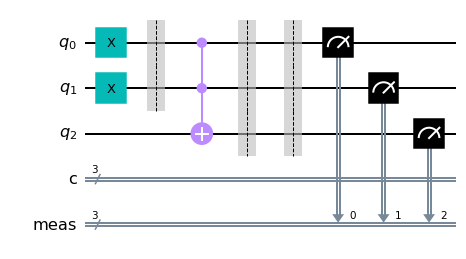

In [11]:
display(circuit.draw())

In [12]:
print(circuit)

        ┌───┐ ░       ░  ░ ┌─┐      
   q_0: ┤ X ├─░───■───░──░─┤M├──────
        ├───┤ ░   │   ░  ░ └╥┘┌─┐   
   q_1: ┤ X ├─░───■───░──░──╫─┤M├───
        └───┘ ░ ┌─┴─┐ ░  ░  ║ └╥┘┌─┐
   q_2: ────────┤ X ├─░──░──╫──╫─┤M├
                └───┘ ░  ░  ║  ║ └╥┘
   c: 3/════════════════════╬══╬══╬═
                            ║  ║  ║ 
meas: 3/════════════════════╩══╩══╩═
                            0  1  2 


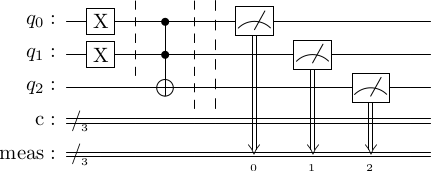

In [14]:
circuit.draw('latex')

In [16]:
!pip install pylatexenc
#print(circuit.draw('latex_source')

In [17]:
!pip install pillow

In [19]:
print(circuit.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{X}} \barrier[0em]{0} & \qw & \ctrl{1} \barrier[0em]{0} & \qw \barrier[0em]{2} & \qw & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{X}} \barrier[0em]{0} & \qw & \ctrl{1} \barrier[0em]{0} & \qw & \qw & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \qw & \targ \barrier[0em]{0} & \qw & \qw & \qw & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{c :  }} & \lstick{\mathrm{c :  }} & \lstick{/_{_{3}}} \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw\\
	 	\nghost{\mathrm{meas :  }} & \lstick{\mathrm{meas :  }} & \lstick{/_{_{3}}} \cw & \cw & \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-4,0] & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-3,0] & \dsti

In [33]:
def and_gate(a, b):
    """
    AND gate
    """
    qc = QuantumCircuit(3, 1)

    # Set up the registers
    if a:
        qc.x(0)
    if b:
        qc.x(1)

    qc.barrier()

    # AND
    qc.ccx(0, 1, 2)

    qc.barrier()

    # Measure
    qc.measure(2, 0)

    #print('Depth: {}'.format(qc.depth()))
    #print(qc)
    job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
    return job.result().get_counts()

In [25]:
print('and_gate(0,0)')
and_gate(0,0)

and_gate(0,0)
Depth: 2
      ░       ░    
q_0: ─░───■───░────
      ░   │   ░    
q_1: ─░───■───░────
      ░ ┌─┴─┐ ░ ┌─┐
q_2: ─░─┤ X ├─░─┤M├
      ░ └───┘ ░ └╥┘
c: 1/════════════╩═
                 0 


{'0': 1024}

In [26]:
print('and_gate(0,1)')
and_gate(0,1)

and_gate(0,1)
Depth: 3
           ░       ░    
q_0: ──────░───■───░────
     ┌───┐ ░   │   ░    
q_1: ┤ X ├─░───■───░────
     └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 


{'0': 1024}

In [27]:
print('and_gate(1,0)')
and_gate(1,0)

and_gate(1,0)
Depth: 3
     ┌───┐ ░       ░    
q_0: ┤ X ├─░───■───░────
     └───┘ ░   │   ░    
q_1: ──────░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 


{'0': 1024}

In [28]:
print('and_gate(1,1)')
and_gate(1,1)

and_gate(1,1)
Depth: 3
     ┌───┐ ░       ░    
q_0: ┤ X ├─░───■───░────
     ├───┤ ░   │   ░    
q_1: ┤ X ├─░───■───░────
     └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 


{'1': 1024}

In [38]:
for i in range(2):
    for j in range(2):
        print('i=',i,'j=',j)
        print(and_gate(i,j))
        

i= 0 j= 0
{'0': 1024}
i= 0 j= 1
{'0': 1024}
i= 1 j= 0
{'0': 1024}
i= 1 j= 1
{'1': 1024}
